<a href="https://colab.research.google.com/github/JorgeLuisPolaris/Machine-and-deep-learning/blob/main/Visi%C3%B3n_computacional_y_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de visión computacional.
---
Empezamos realizando las importaciones necesarias.

In [1]:
import tensorflow as tf

# Carga de datos
---

Los datos del dataset de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de tf.keras y se cargan de la siguiente forma:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a load_data en este objeto regresará dos conjuntos de dos listas cada uno, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Manipulación de los datos.
---
Para poder ver los valores imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para observarlos.

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70 

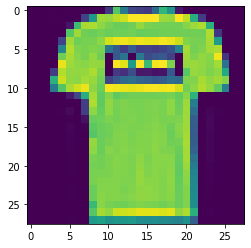

In [13]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1])

Podemos observar los resultados y darnos cuenta de que las etiquetas se encuentran en número en lugar de palabras, esto es debido a que las computadoras trabajan mejor con los números y además ayudan a reducir el bias del lenguaje que usamos para nombrarlas, también se notará que todos los valores de valores en los pixeles están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si tratamos todos los valores entre 0 y 1, un proceso llamado "normalización". Afortunadamente en Python es fácil normalizar una lista como esta sin hacer bucles.

In [14]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Diseño del modelo de la red neuronal.
---

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation= tf.nn.softmax)])

***Sequential:*** Una secuencia de capas de una red neuronal.

***Flatten:*** Pasa los datos de su forma de imagen cuadrada a un set unidimensional.

***Dense:*** Añade una cada a la red neuronal, cada capa necesita de una función de activación 'activation' pero se usarán estas por ahora.

***Relu:*** Significa que 'Si X > 0 regresa X, si no regresa 0'

***Softmax*** Toma el valor más grande de un set de valores, por ejemplo si la salida de la última capa es [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], tranforma el resultado a [0,0,0,0,1,0,0,0,0] 

Lo siguiente que se debe hacer, ahora que el modelo está definido, es construirlo. Para ello es necesario compilarlo con un optimizador y una función de pérdida para posteriormente entrenarlo llamando a * model.fit * pidiéndole que ajuste sus datos de entrenamiento a sus etiquetas de entrenamiento, es decir, que averigüe la relación entre los datos de entrenamiento y sus etiquetas reales, por lo que en el futuro, si tiene datos que se parecen a los datos de entrenamiento, entonces puede hacer una predicción de cómo se verían esos datos.


In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.8939
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2641 - accuracy: 0.8998
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9063
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2449 - accuracy: 0.9089
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2425 - accuracy: 0.9096
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2280 - accuracy: 0.9141
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9160
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2115 - accuracy: 0.9205
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2081 - accuracy: 0.9223
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

#Prueba del modelo
---

Una vez terminado el entrenamiento podremos ver el nivel de presición de cada época pero cómo podríamos probarlo con información que aún no ha visto nuestro modelo, es por eso que se guardaron imagenes de test para evaluar el modelo.

In [20]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.7809 - accuracy: 0.8924


[0.7808898687362671, 0.8924000263214111]

#Callbacks
---

Anteriormente al entrenar nuestro modelo pudimos darnos cuenta que la presición llegada a cierto punto en las épocas empezaba a fluctuar y ya no mejoraba significativamente ( o incluso empeoraba ) esto puede darse debido al overfitting, para evitar esto y grandes tiempos de entrenamiento utilizaremos callbacks.

In [21]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nAlcanzado un 60% de presición por lo que se cancela el entrenamiento")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
model.evaluate(test_images, test_labels)

2.4.1
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5957
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3715

Alcanzado un 60% de presición por lo que se cancela el entrenamiento
313/313 [==============================] - 1s 2ms/step - loss: 0.3910


0.39095374941825867